In [5]:
import epydemix as epx
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
model = epx.EpiModel(compartments=["S", "I", "R"])

model.add_transition("S", "I", params=("beta", "I"), kind="mediated")
model.add_transition("I", "R", params="mu", kind="spontaneous")

model.add_parameter("beta", 0.02)
model.add_parameter("mu", 0.2)

population = epx.population.load_epydemix_population("United_States_North_Carolina")
model.set_population(population)


In [17]:
initial_conditions = {
    "S": model.population.Nk - (model.population.Nk * 0.05 / 100).astype(int),
    "I": (model.population.Nk * 0.05 / 100).astype(int),
    "R": np.zeros(len(model.population.Nk))
}

In [18]:
results = model.run_simulations(
    start_date="2025-01-01", 
    end_date="2025-05-31",
    initial_conditions_dict=initial_conditions,
    Nsim=10
    )


In [36]:
df_tr = results.get_quantiles_transitions()
df_tr = df_tr.loc[df_tr["quantile"] == 0.5]

df_tr = df_tr[["date", "S_to_I_total"]]
df_tr["S_to_I_total"] = df_tr["S_to_I_total"].astype(int)

# add noise
delta = 0.1
df_tr["S_to_I_total"] = df_tr["S_to_I_total"] + ((np.random.normal(0, delta, len(df_tr)) - delta/2) * df_tr["S_to_I_total"])

# fix negative values
df_tr["S_to_I_total"] = df_tr["S_to_I_total"].clip(lower=0)
df_tr["S_to_I_total"] = df_tr["S_to_I_total"].astype(int)

df_tr.head()

,date,S_to_I_total
453,2025-01-01,1309
454,2025-01-02,1468
455,2025-01-03,1419
456,2025-01-04,1680
457,2025-01-05,1734


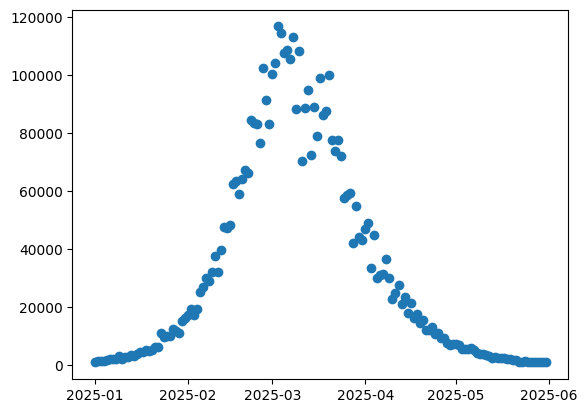

In [37]:
plt.scatter(df_tr["date"], df_tr["S_to_I_total"])

In [38]:
df_tr.to_csv("../data/incidence_data.csv", index=False)